In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as aplt
import os
import cv2 
from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k

In [3]:
from keras.preprocessing.image import ImageDataGenerator,load_img


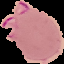

In [4]:
load_img(r"C:\Users\preeti\Downloads\archive\Malarial Cell Image Data\malarial_cell_image_data\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142128_cell_78.png",target_size=(64,64))

In [5]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(312)

In [15]:
img_dir=r"C:\\Users\\preeti\\Downloads\\archive\\Malarial Cell Image Data\\cell_images\\"
size =64
dataset=[]
label=[]

In [16]:
parasitized_img=os.listdir(img_dir+"Parasitized/")
for i,img_name in enumerate(parasitized_img):
    if(img_name.split('.')[1]=='png'):
        image=cv2.imread(img_dir+"Parasitized/"+img_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        dataset.append((np.array(image)))
        label.append(0)

In [19]:
Uninfected_img=os.listdir(img_dir+"Uninfected/")
for i,img_name in enumerate(Uninfected_img):
    if(img_name.split('.')[1]=='png'):
        image=cv2.imread(img_dir+"Uninfected/"+img_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        dataset.append((np.array(image)))
        label.append(1)

In [21]:
len(Uninfected_img)

4133

In [22]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
x_train,x_test,y_train,y_test=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0)

In [36]:
import tensorflow.keras.layers as K
INPUT_SHAPE=(size,size,3)
inp=K.Input(shape=INPUT_SHAPE)
conv1=K.Conv2D(32,kernel_size=(3,3),activation='relu',padding="same")(inp)
pool1=K.MaxPool2D(pool_size=(2,2))(conv1)
norm1=K.BatchNormalization(axis=-1)(pool1)
drop1=K.Dropout(rate=0.2)(norm1)

conv2=K.Conv2D(32,kernel_size=(3,3),activation='relu',padding="same")(drop1)
pool2=K.MaxPool2D(pool_size=(2,2))(conv2)
norm2=K.BatchNormalization(axis=-1)(pool2)
drop2=K.Dropout(rate=0.2)(norm2)

flat=K.Flatten()(drop2)
hidden1=K.Dense(512,activation="relu")(flat)
norm3=K.BatchNormalization(axis=-1)(hidden1)
drop3=K.Dropout(rate=0.2)(norm3)

hidden2=K.Dense(256,activation="relu")(drop3)
norm4=K.BatchNormalization(axis=-1)(hidden2)
drop4=K.Dropout(rate=0.2)(norm4)
out=K.Dense(2,activation="sigmoid")(drop4)



In [51]:
model=keras.Model(inputs=inp,outputs=out)
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248

In [52]:
history=model.fit(np.array(x_train),y_train,batch_size=64,verbose=1,epochs=5,validation_split=0.1,shuffle=False)

Epoch 1/5


202/202 [==============================] - 27s 122ms/step - loss: 0.5836 - accuracy: 0.7408 - val_loss: 0.8332 - val_accuracy: 0.5707
Epoch 2/5
202/202 [==============================] - 24s 121ms/step - loss: 0.2923 - accuracy: 0.8794 - val_loss: 1.9069 - val_accuracy: 0.5024
Epoch 3/5
202/202 [==============================] - 22s 109ms/step - loss: 0.2218 - accuracy: 0.9117 - val_loss: 0.2280 - val_accuracy: 0.9157
Epoch 4/5
202/202 [==============================] - 23s 114ms/step - loss: 0.1866 - accuracy: 0.9273 - val_loss: 0.2863 - val_accuracy: 0.9003
Epoch 5/5
202/202 [==============================] - 23s 116ms/step - loss: 0.1691 - accuracy: 0.9330 - val_loss: 0.1989 - val_accuracy: 0.9233


In [53]:
print("Test_Accuracy:{:.2f}%".format(model.evaluate(np.array(x_test),np.array(y_test))[1]*100))

113/113 [==============================] - 1s 12ms/step - loss: 0.1794 - accuracy: 0.9317
Test_Accuracy:93.17%
